# Question 1
***
__Group No. 52__
- CS23MTECH14019 - Yug Patel
- CS23MTECH11026 - Bhargav Patel

In [1]:
# Import required libraires
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [2]:
# Load the .mat file
svhn_data = loadmat(r'train_32x32.mat')
# Access the images and labels
X = svhn_data['X']
y = svhn_data['y']

### Creating subset of dataset (2500 samples per label)

In [3]:
# Randomly choose 2500 samples from each class
num_samples_per_class = 2500
selected_indices = np.concatenate([np.where(y == i)[0][:num_samples_per_class] for i in range(1, 11)])
X_subset = X[:,:,:,selected_indices]
y_subset = y[selected_indices]
X_subset.shape
y_subset.shape

(25000, 1)

In [4]:
# Reshaping the dataset for further simplification
num_samples = X_subset.shape[3]
X_reshaped = X_subset.transpose(3, 0, 1, 2).reshape(num_samples, -1)

## Question 1(a)
1. Training PCA model on subset of dataset using sklearn
2. Finding no. of components whose cummulative variance > 0.9
3. Plot of PoV vs No. of principle component

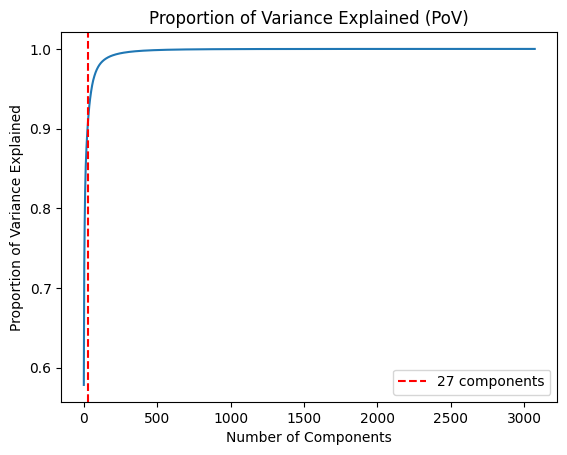

Number of top eigenvectors required to keep the proportion of variance above 0.9: 27


In [5]:
# Initialize PCA
pca = PCA()

# Fit PCA on the data
pca.fit(X_reshaped)

# Calculate the cumulative explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components for 0.9 proportion of variance
num_components = np.argmax(cumulative_variance > 0.9) + 1

# Plot PoV against number of components
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance Explained')
plt.title('Proportion of Variance Explained (PoV)')
plt.axvline(x=num_components, color='r', linestyle='--', label=f'{num_components} components')
plt.legend()
plt.show()

print(f"Number of top eigenvectors required to keep the proportion of variance above 0.9: {num_components}")

## Question 1(b)
__Visualization of Top 10 principle components__

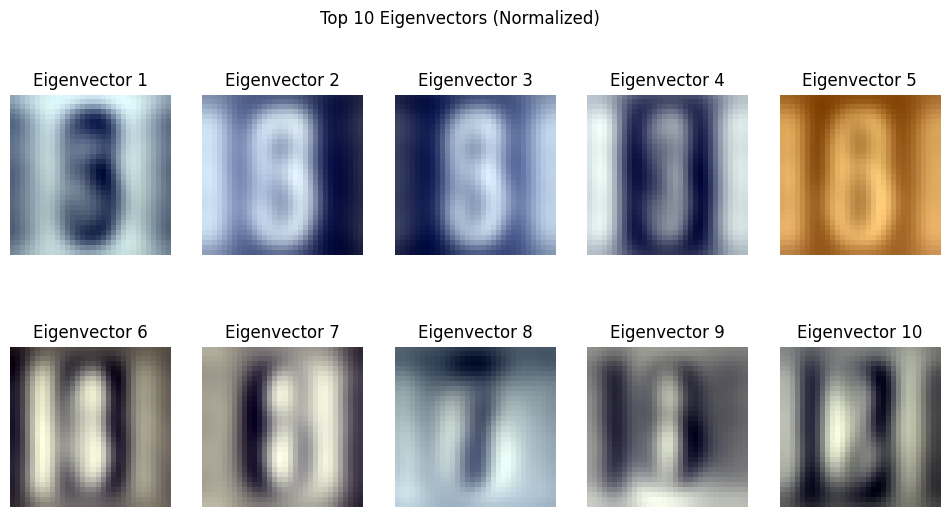

In [6]:
pca = PCA(n_components=10,whiten=True)
pca.fit(X_reshaped)

# Get the top 10 eigenvectors after fitting PCA
top_eigenvectors = pca.components_

# Visualize top 10 eigenvectors after normalization
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i,  ax in enumerate(axes.flat):
    # Normalize pixel values to be within [0, 1]
    eigenvector = top_eigenvectors[i]
    min_val, max_val = np.min(eigenvector), np.max(eigenvector)
    eigenvector = (eigenvector - min_val) / (max_val - min_val)
    ax.imshow(eigenvector.reshape(32, 32, 3))
    ax.set_title(f"Eigenvector {i+1}")
    ax.axis('off')

plt.suptitle('Top 10 Eigenvectors (Normalized)')
plt.show()


#### Reconstructing 10 SVHN samples one per class using top 10 eigenvectors

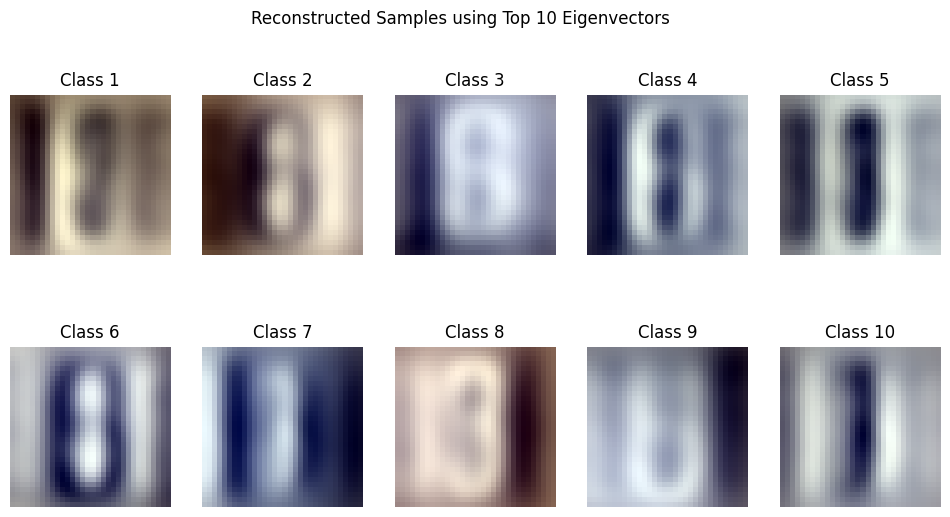

In [7]:
reconstructed_samples = []
for i in range(1,11):  # One sample from each class
    index = np.where(y == i)[0][0] # Get the first sample index for each class
    sample = X_reshaped[index]
    # Project the sample onto the reduced feature space and then reconstruct it
    reconstruction = pca.inverse_transform(pca.transform(sample[np.newaxis, :])) 
    reconstructed_samples.append(reconstruction)

# Adjust pixel values to fall within the expected range
#reconstructed_samples = np.clip(reconstructed_samples, 0, 1)  # For pixel values in the [0, 1] range
    
# Display reconstructed samples
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    reconstructed_sample = reconstructed_samples[i]
    min, max = np.min(reconstructed_sample),np.max(reconstructed_sample)
    ax.imshow(((reconstructed_sample-min)/(max-min)).reshape(32, 32, 3))
    ax.set_title(f"Class {i+1}")
    ax.axis('off')

plt.suptitle('Reconstructed Samples using Top 10 Eigenvectors')
plt.show()

## Question 1(c)
***
- Creating three set of dataset
1. Raw dataset (25000 samples, 2500 from each class)
2. Dataset obtained by dimensionality reduction from 1(a)
3. Dataset obtained by dimensionality reduction from 1(b)

In [8]:
num_obs = X.shape[3]
X_train = X_reshaped
y_train = y_subset

test_data =  loadmat(r'test_32x32.mat')
X_test = test_data['X'].transpose(3,0,1,2).reshape(test_data['X'].shape[3],-1)
y_test = test_data['y']

# Fit PCA for dimension found in part (a)
pca_a = PCA(n_components=num_components)
X_train_pca_a = pca_a.fit_transform(X_train)
X_test_pca_a = pca_a.transform(X_test)

# Fit PCA for dimension 10 part (b)
pca_b = PCA(n_components=10)
X_train_pca_b = pca_b.fit_transform(X_train)
X_test_pca_b = pca_b.transform(X_test)

### Running k-NN with k = 5 on raw dataset, 1(a) and 1(b)

In [9]:
# Run k-NN on raw data for k=5
knn_raw_5 = KNeighborsClassifier(n_neighbors=5)
knn_raw_5.fit(X_train, y_train.ravel())
accuracy_raw_5 = knn_raw_5.score(X_test, y_test.ravel())

# Run k-NN on data obtained after PCA for dimension from part (a) for k=5
knn_pca_a_5 = KNeighborsClassifier(n_neighbors=5)
knn_pca_a_5.fit(X_train_pca_a, y_train.ravel())
accuracy_pca_a_5 = knn_pca_a_5.score(X_test_pca_a, y_test.ravel())

# Run k-NN on data obtained after PCA for dimension from part (a) for k=5
knn_pca_b_5 = KNeighborsClassifier(n_neighbors=5)
knn_pca_b_5.fit(X_train_pca_b, y_train.ravel())
accuracy_pca_b_5 = knn_pca_b_5.score(X_test_pca_b, y_test.ravel())

C:\Users\bpate\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bpate\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

### Running k-NN with k = 7 on raw dataset, 1(a) and 1(b)

In [10]:
# Run k-NN on raw data for k=7
knn_raw_7 = KNeighborsClassifier(n_neighbors=7)
knn_raw_7.fit(X_train, y_train.ravel())
accuracy_raw_7 = knn_raw_7.score(X_test, y_test.ravel())

# Run k-NN on data obtained after PCA for dimension from part (a) for k=7
knn_pca_a_7 = KNeighborsClassifier(n_neighbors=7)
knn_pca_a_7.fit(X_train_pca_a, y_train.ravel())
accuracy_pca_a_7 = knn_pca_a_7.score(X_test_pca_a, y_test.ravel())

# Run k-NN on data obtained after PCA for dimension from part (a) for k=7
knn_pca_b_7 = KNeighborsClassifier(n_neighbors=7)
knn_pca_b_7.fit(X_train_pca_b, y_train.ravel())
accuracy_pca_b_7 = knn_pca_b_7.score(X_test_pca_b, y_test.ravel())

C:\Users\bpate\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bpate\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

### Accuracy of the k-NN model with k=5 and k=7

In [11]:
# Storing accuracy results in a dictionary
accuracy_results = {
    'k_value': [5, 7],
    'raw_data_accuracy': [accuracy_raw_5, accuracy_raw_7],
    'pca_a_accuracy': [accuracy_pca_a_5, accuracy_pca_a_7],
    'pca_b_accuracy': [accuracy_pca_b_5, accuracy_pca_b_7]
}

accuracy_df = pd.DataFrame(accuracy_results)
print(accuracy_df)

   k_value  raw_data_accuracy  pca_a_accuracy  pca_b_accuracy
0        5           0.402774        0.399624        0.251844
1        7           0.411609        0.410917        0.260986
